In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\orteg\AppData\Local\Temp\ipykernel_15700\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Model 1

## Person

In [4]:
person = pd.read_csv('Data/name-basics.tsv', sep='\t')
crewmember = pd.read_csv('Data/title-crew.tsv', sep='\t')
castingmember = pd.read_csv('Data/title-principals.tsv', sep='\t')

In [23]:
castingmember.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


##### Average number of film per director

In [22]:
u_crewmember = crewmember.drop_duplicates(subset='tconst', keep='first')
u_crewmember.groupby('directors').count().mean()

tconst     10.997118
writers    10.997118
dtype: float64

##### Average number of different jobs per person

In [27]:
#left join castingmember and person
person_crew = pd.merge(person, castingmember, left_on='nconst', right_on='nconst', how='left')
person_crew.groupby('nconst').count().mean()

primaryName          5.163444
birthYear            5.163445
deathYear            5.163445
primaryProfession    4.774606
knownForTitles       5.163445
tconst               4.561020
ordering             4.561020
category             4.561020
job                  4.561020
characters           4.561020
dtype: float64

In [28]:
upc = person_crew.drop_duplicates(subset="job", keep="first")
upc.groupby('nconst').count().mean()

primaryName          1.606387
birthYear            1.606387
deathYear            1.606387
primaryProfession    1.605714
knownForTitles       1.606387
tconst               1.606348
ordering             1.606348
category             1.606348
job                  1.606348
characters           1.606348
dtype: float64

## Film

In [30]:
film = pd.read_csv('Data/title-basic.tsv', sep='\t')
akas = pd.read_csv('Data/title-akas.tsv', sep='\t')

C:\Users\orteg\AppData\Local\Temp\ipykernel_14024\3115416142.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  film = pd.read_csv('Data/title-basic.tsv', sep='\t')
C:\Users\orteg\AppData\Local\Temp\ipykernel_14024\3115416142.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv('Data/title-akas.tsv', sep='\t')


In [31]:
average_akas = akas.groupby('titleId').count().mean()['ordering']
print(average_akas)

5.11745229574588


# Model 2

In [3]:
film = pd.read_csv('Data/title-basic.tsv', sep='\t')
crewmember = pd.read_csv('Data/title-crew.tsv', sep='\t')
castingmember = pd.read_csv('Data/title-principals.tsv', sep='\t')
person = pd.read_csv('Data/name-basics.tsv', sep='\t')

C:\Users\orteg\AppData\Local\Temp\ipykernel_15700\789035695.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  film = pd.read_csv('Data/title-basic.tsv', sep='\t')


In [5]:
mean_model2 = castingmember.groupby('tconst').nunique().mean()
print(mean_model2)

ordering      6.327039
nconst        6.327033
category      3.238785
job           1.758173
characters    3.296679
dtype: float64


In [ ]:
# Calculate the average number of unique casting members per film
mean_model2 = castingmember.groupby('tconst').nunique().mean()

C:\Users\orteg\AppData\Local\Temp\ipykernel_15700\4141446363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_model2.index, y=mean_model2.values, palette='pastel')


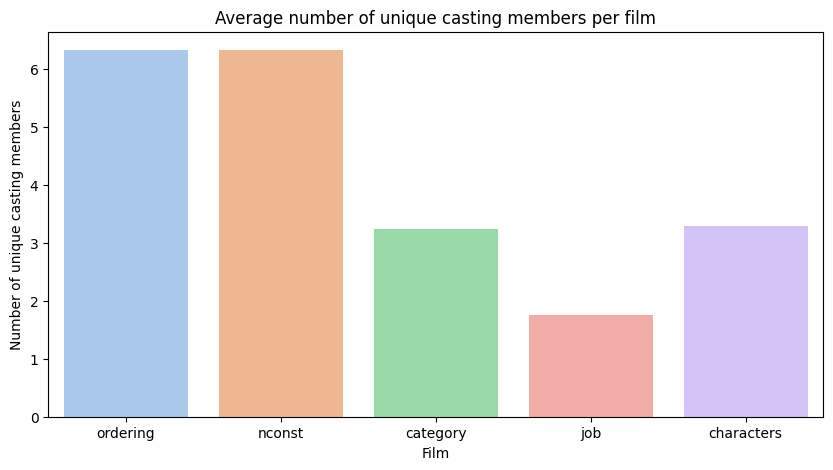

In [7]:
#sns barplot    
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_model2.index, y=mean_model2.values, palette='pastel')
plt.title('Average number of unique casting members per film')
plt.xlabel('Film')
plt.ylabel('Number of unique casting members')
plt.show()


In [15]:
# number of director per film 
number_of_directors = crewmember.groupby('tconst').count

C:\Users\orteg\AppData\Local\Temp\ipykernel_15700\1881079219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_model2_crew.index, y=mean_model2_crew.values, palette='pastel')


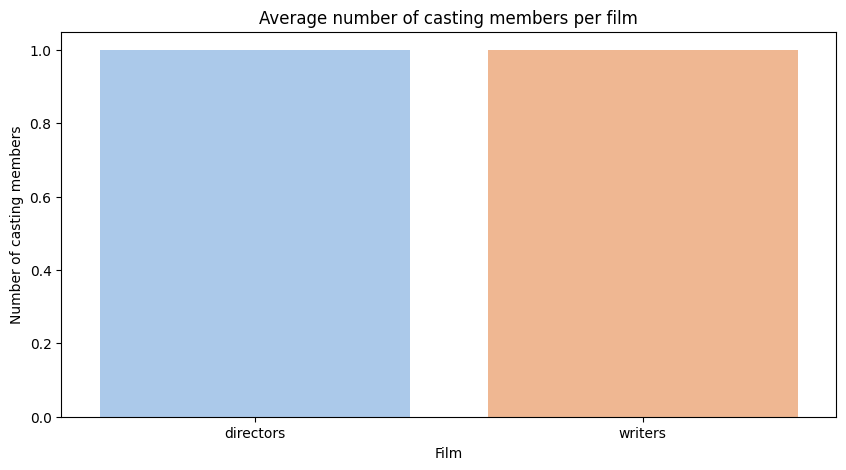

In [16]:
# original plot equivalent to barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_model2_crew.index, y=mean_model2_crew.values, palette='pastel')
plt.title('Average number of casting members per film')
plt.xlabel('Film')
plt.ylabel('Number of casting members')
plt.show()